In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<h1 style='font-family:Trebuchet MS; color:#34495E'> DataSet <a id='0'></a></h1>
<p style='font-family:Trebuchet MS'>The dataset can be found on <a href='https://www.kaggle.com/anthonypino/melbourne-housing-market'> Kaggle </a>.

<h1 style='font-family:Trebuchet MS; color:#34495E'> Table of Contents </h1>

<div class='alert alert-block alert-info' style='font-family:Trebuchet MS; color:#34495E'>

1.[DataSet](#0)<br>
2.[Null & Unique Values Distribution](#1) <br>
3.[Exploring Target Variable (Price)](#2) <br>
    3.1 [Price Distribution in Melbourne](#2.1)<br>
    3.2 [Price Distribution in Each Region](#2.2)<br>
    3.3 [Seasonality & Trend](#2.3)<br>
    3.4 [Y-o-y change (by House Sale) ](#2.4)<br>
4. [Distance from City](#3)<br>
5. [Correlation between Variables ](#4)<br>

        
</div>

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<h1 style='font-family:Trebuchet MS; color:#34495E'> Null & Unique Values Distribution <a id='1'></a></h1>

In [4]:
from collections import defaultdict

In [5]:
def NullUnique(df):
    dic = defaultdict(list)
    for i in df.columns:
        dic['Features'].append(i)
        dic['Unique'].append(len(df[i].unique()))
        dic['Null'].append(round(df[i].isnull().sum()))
        dic['%Null'].append(round((df[i].isnull().mean())*100/2,2))
        dic['DataType'].append(df[i].dtypes)
    return pd.DataFrame(dict(dic)).sort_values(['%Null'], ascending=False).style.background_gradient()

In [6]:
NullUnique(df)

,Features,Unique,Null,%Null,DataType
14,BuildingArea,741,21115,30.290000,float64
15,YearBuilt,161,19306,27.690000,float64
13,Landsize,1685,11810,16.940000,float64
12,Car,16,8728,12.520000,float64
11,Bathroom,12,8226,11.800000,float64
10,Bedroom2,16,8217,11.790000,float64
18,Longtitude,14525,7976,11.440000,float64
17,Lattitude,13403,7976,11.440000,float64
4,Price,2872,7610,10.920000,float64
19,Regionname,9,3,0.000000,object


<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations (Null Values):</h4>
<p style='font-family:Trebuchet MS'>1. <code>BuildingArea, YearBuilt, Car</code> consists of 30.29%, 27.69%, 16.94% NullValues, more than 15% are NullValues.
<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations (Data Types & Unique Value):</h4>
<p style='font-family:Trebuchet MS'>1. <code>Regionname, CouncilArea, Suburb, Address, SellerG, Method, Type</code> are <code> Categorical </code> Variables. <br>
    2. <code> BuildingArea, YearBuilt, Landsize, Car, Bathroom, Bedroom2, Price, Dsitance, Rooms, Propertycount</code> are <code> Numerical </code> Variables. <br>
    3. <code> Longtitude, Lattitude, Postcode </code> are <code>Geospatial</code> columns.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

<h1 style='font-family:Trebuchet MS; color:#34495E'> Exploring Target Variable (Price)  <a id='2'></a></h1>

<h2 style='font-family:Trebuchet MS; color:#34495E'> Price Distribution in Melbourne  <a id='2.1'></a></h1>

In [8]:
import seaborn as sns

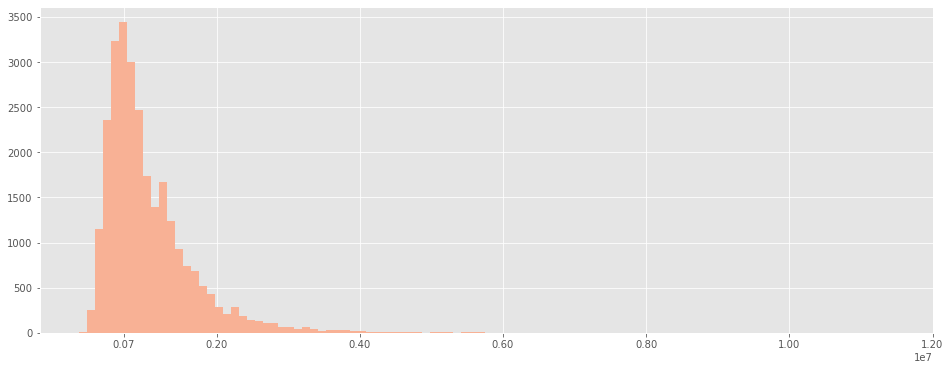

In [9]:
fig, ax = plt.subplots()
df['Price'].hist(figsize=(16,6), color='#F8B195',bins=100)
plt.xticks()
ax.set_xticks([700000,2000000,4000000,6000000, 8000000, 10000000, 12000000])
plt.show()

In [10]:
df['Price'].max()

11200000.0

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations (Histogram):</h4>
<p style='font-family:Trebuchet MS'>
The distribution of price of house in Melbourne is unimodal and skewed to the right. Centered at a about AUD 700,000 with most of the data between AUD 500,000 (3rd bar) and AUD 900,000 (7th bar). A range of roughly AUD 11,200,000, and outliers are present on the higher end. <a href='https://www.coursera.org/learn/understanding-visualization-data/lecture/5VDec/quantitative-data-histograms '> Histogram explanation Reference.</a></p>

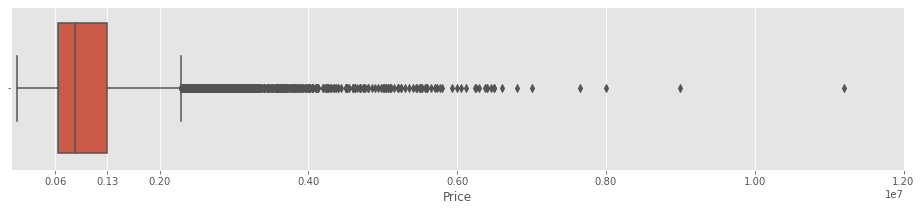

In [11]:
fig, ax = plt.subplots(figsize=(16,3))
sns.boxplot(x=df['Price'], data=df)
plt.xlim(0,12000000)
ax.set_xticks([600000, 1300000, 2000000,4000000,6000000, 8000000, 10000000, 12000000])
plt.show()

In [12]:
df['Price'].describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

<p style='font-family:Trebuchet MS; color:#34459E'> Outliers </p>
<p style='font-family:Trebuchet MS'> Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<p style='font-family:Trebuchet MS'> 
-   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,<br>
-   smaller than Q1 by at least 1.5 times the IQR.

In [13]:
IQR = df['Price'].describe().loc['75%'] - df['Price'].describe().loc['25%']
outliers = df['Price'].describe().loc['75%'] + 1.5*IQR
outliers

2285000.0

In [14]:
df[df['Price']>outliers].shape

(1278, 21)

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations (Boxplot):</h4>
<p style='font-family:Trebuchet MS'>
The mean house price is AUD 1,050,173. The IQR (Q3 - Q1) is about AUD 660,000. Outliers are data points greater than AUD 2,285,000, there are 1278 outliers.
    

<h2 style='font-family:Trebuchet MS; color:#34495E'> Price Distribution in Each Region  <a id='2.2'></a></h1>

https://rayheberer.medium.com/generating-matplotlib-subplots-programmatically-cc234629b648

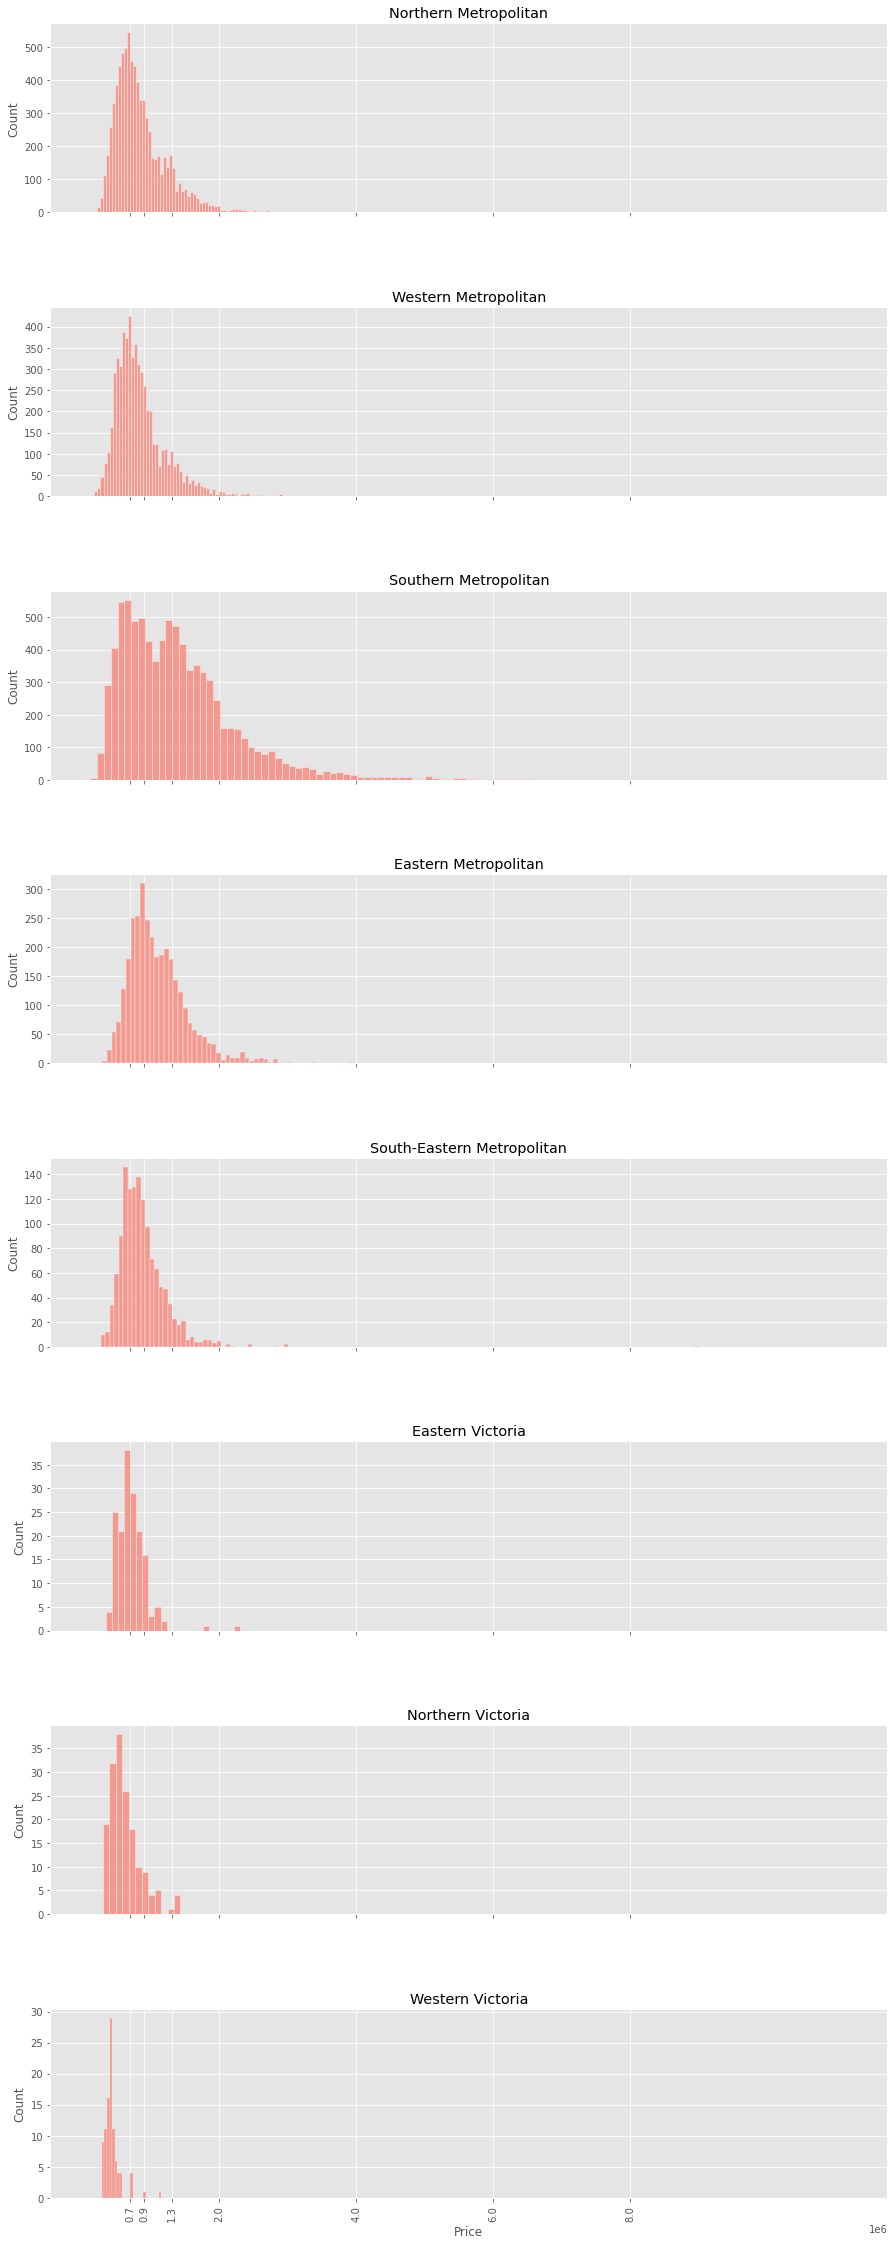

In [15]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15,40), sharex=True)
for ax, k in zip(axes.flatten(), df['Regionname'].unique()):
    sns.histplot(df[df['Regionname']==k]['Price'], color='salmon', ax=ax)
    ax.set_title(k)
    ax.set_xticks([700000,900000,  1300000, 2000000,4000000,6000000, 8000000])
    plt.xticks(rotation=90)
    plt.subplots_adjust(wspace=.4, hspace=.5)
plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>1. Exclusive Region: Southern Metropolitan and Eastern Metropolitan are more exclusive (more data points allocated in a higher price range). <br>
    <ol style='font-family:Trebuchet MS'> Southern Metropolitan - Bimodal Distribution, the distribution centered at around AUD 600,00 and AUD 1,300,00. <br>
    Eastern Metropolitan - Unimodal Distribution, the distribution centered at around AUD 900,00. </ol>
    South-Eastern Metropolitan - Bimodal Distribution, the distribution centered at around AUD 600,00 and AUD 900,00. </ol>
    
<p style='font-family:Trebuchet MS'>2. Less exclusive: The regions of Victoria tends to be more accessible compared to the exclusive regions (Metropolitan). <br>
    <ol style='font-family:Trebuchet MS'> All of the histogram centered at a lower price (< AUD700,00)

In [16]:
c = df[['Regionname','Price']].groupby(['Regionname']).count().rename(columns={'Price':'Count'})
avg = df[['Regionname','Price']].groupby(['Regionname']).median().rename(columns={'Price':'Avg Price'})
df_price = pd.concat([c, avg], axis=1)
df_price['Avg Price']=df_price['Avg Price']/1000000
df_price = df_price.reset_index()

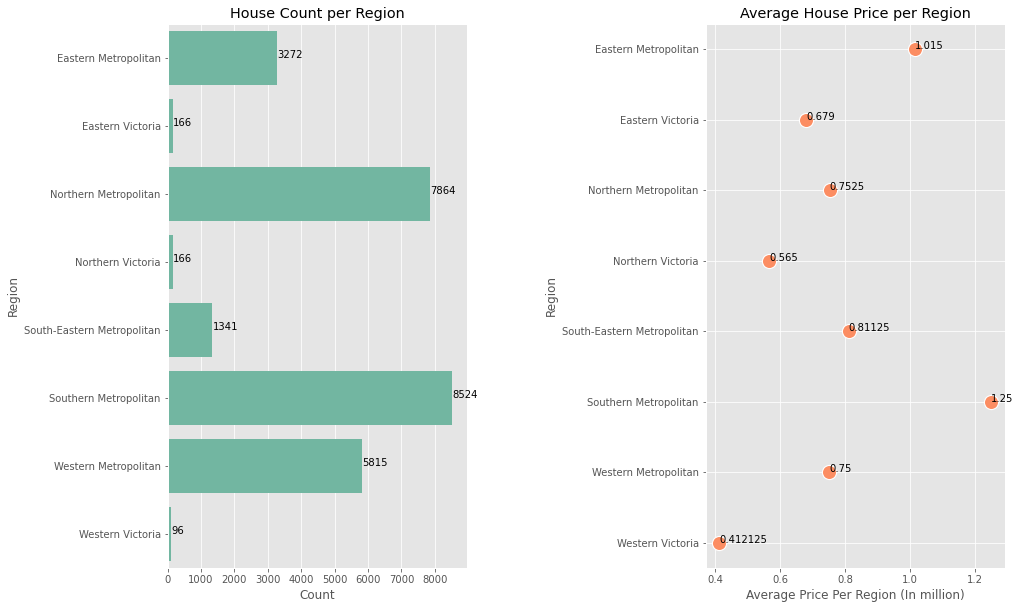

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.barplot(y='Regionname', x='Count', data=df_price, ax=ax[0], color=sns.color_palette("Set2")[0])
for rect in ax[0].patches:
    ax[0].text(rect.get_width(), rect.get_y()+rect.get_height()/2, '%d' %rect.get_width())
ax[0].set_ylabel('Region')
ax[0].set_xlabel('Count')
ax[0].set_title('House Count per Region')
fig.subplots_adjust(wspace=0.8)

sns.scatterplot(y='Regionname', x='Avg Price', data=df_price, ax=ax[1],  marker='o', s=200, color=sns.color_palette("Set2")[1])
for i, txt in enumerate(df_price['Avg Price']):
    ax[1].annotate(txt, (df_price['Avg Price'][i], i))
    
ax[1].set_ylabel('Region')
ax[1].set_xlabel('Average Price Per Region (In million)')
ax[1].set_title('Average House Price per Region')

plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>1. Count Plot: The dataset consists of more datas from Southern Metropolitan, Northern Metropolitan, Western Metropolitan, Eastern Metropolitan which indicates that people usually prefer houses at these region. <br>
    2. Average House Price Plot: Similar to the above histogram, Southern Metropolitan has the highest Avg Price, followed by Eastern Metorpolitan, South-Eastern Metropolitan. 

<h2 style='font-family:Trebuchet MS; color:#34495E'> Seasonality & Trend (By Count)  <a id='2.3'></a></h1>

In [18]:
df_price = df[['Price', 'Date']]
df_price = df_price.set_index(['Date'])

In [19]:
df_price.index = pd.to_datetime(df_price.index)
df_price = df_price.resample('MS').count()
df_price['Year'] = [d.year for d in df_price.index]
df_price['Month'] = [d.strftime('%b') for d in df_price.index]
df_price['MonthNumber'] = [d.strftime('%m') for d in df_price.index]

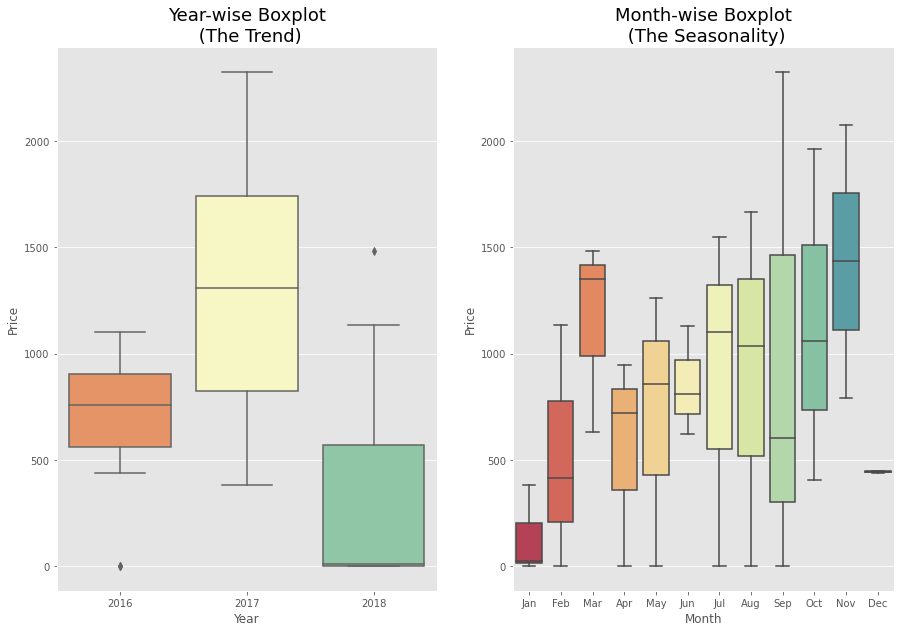

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,10))
sns.boxplot(x='Year', y='Price', data=df_price, ax=axes[0], palette='Spectral')
sns.boxplot(x='Month', y='Price', data=df_price, ax=axes[1], palette='Spectral')
axes[0].set_title('Year-wise Boxplot\n (The Trend)', fontsize=18)
axes[1].set_title('Month-wise Boxplot\n (The Seasonality)', fontsize=18)
plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>1. Year-wise plot: The price is considered to be in downtrend (huge drop in 2018 even considering the data only consists of data points until October 2018).<br>
    2. Month-wise plot: Price of house in March is considered to be considerably higher (higher median). The other months with higher price are September (higher max), October and November (higher median).

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

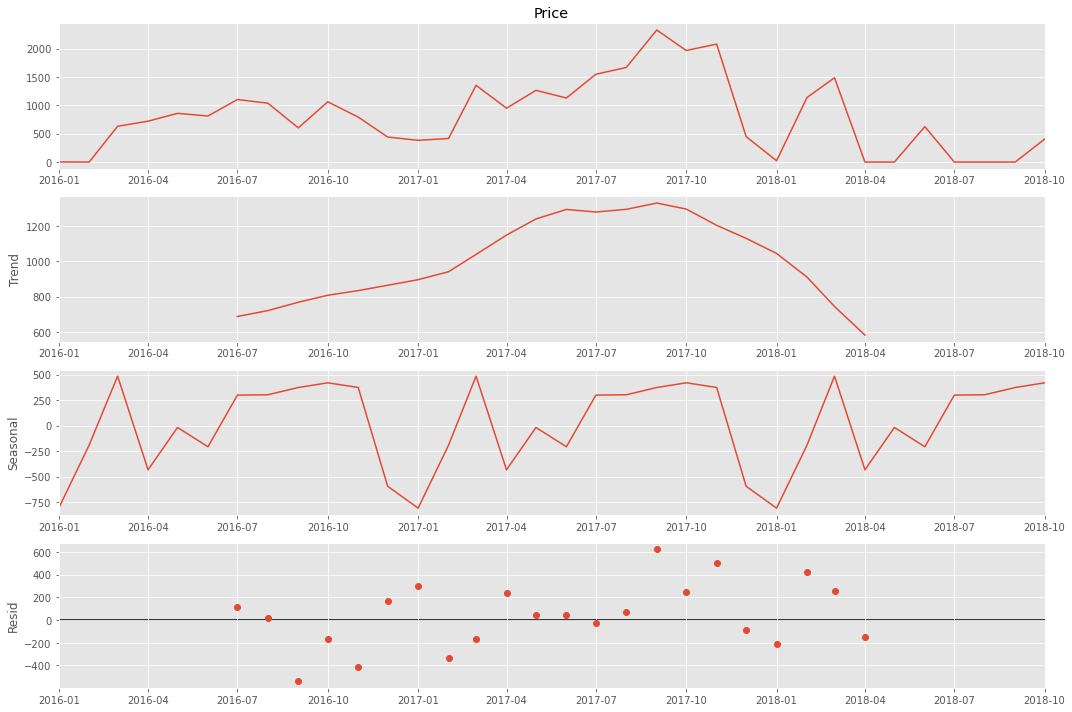

In [22]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_price['Price'])
decomposition.plot()
plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>1. Trend: It infers that the House Price is at peak in the year 2017 (about June 2017 to October 2017).<br>
    2. Seasonal: It seems like the house sale at the beginning of every year (January) is very low then it grew continue through March and went down in April and finally went up after April and reach the peak in October. <br>
    3. Residual: There are some residual in every month. 

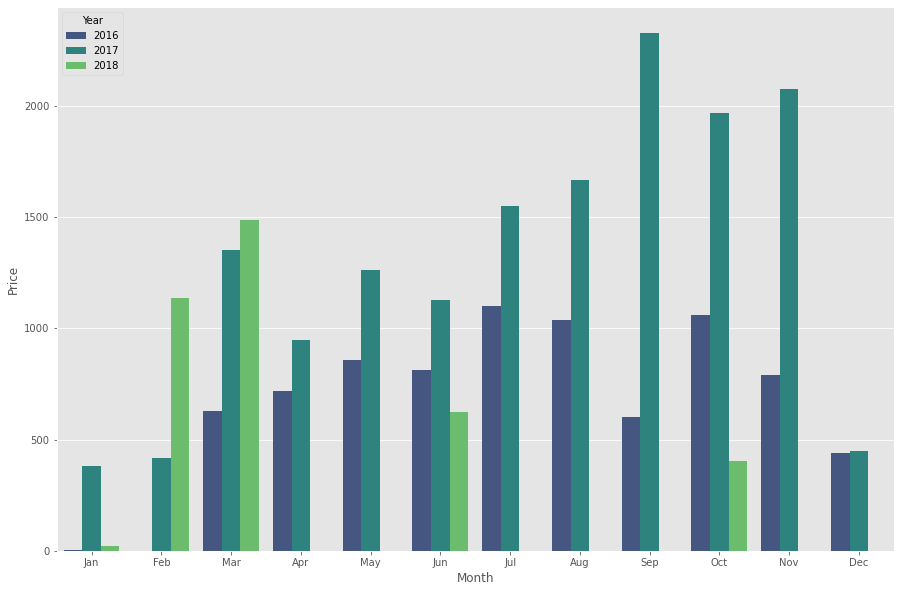

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_price['Month'], y=df_price['Price'], hue=df_price['Year'], palette="viridis")
plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>By looking at this bar chart, it shows that there are few months in the year 2018 did not have house sale at all. The months with house sales are January, February, March, June and October which leads to 2 hypothesis:<br>
    1. There are missing data in the months without sales.<br>
    2. Housing market is cooling down (if there are no mising datas).<br>
    Looking closer at the bar, it is easy to observe that in the year 2017, number of the house traded is quite less, maybe the slowing down in housing market maybe started in Dec 2017.

<h2 style='font-family:Trebuchet MS; color:#34495E'> Y-o-y change (by House Sale)  <a id='2.4'></a></h1>

In [24]:
df_price = df[['Price', 'Date']]
df_price = df_price.set_index(['Date'])
df_price.index = pd.to_datetime(df_price.index)
df_price = df_price.resample('MS').sum()
df_price['Year'] = [d.year for d in df_price.index]
df_price['Month'] = [d.strftime('%b') for d in df_price.index]
df_price['MonthNumber'] = [d.strftime('%m') for d in df_price.index]

In [25]:
df_price['pct'] = df_price['Price'].pct_change(12).replace(np.nan, 0).replace(np.inf, 0)

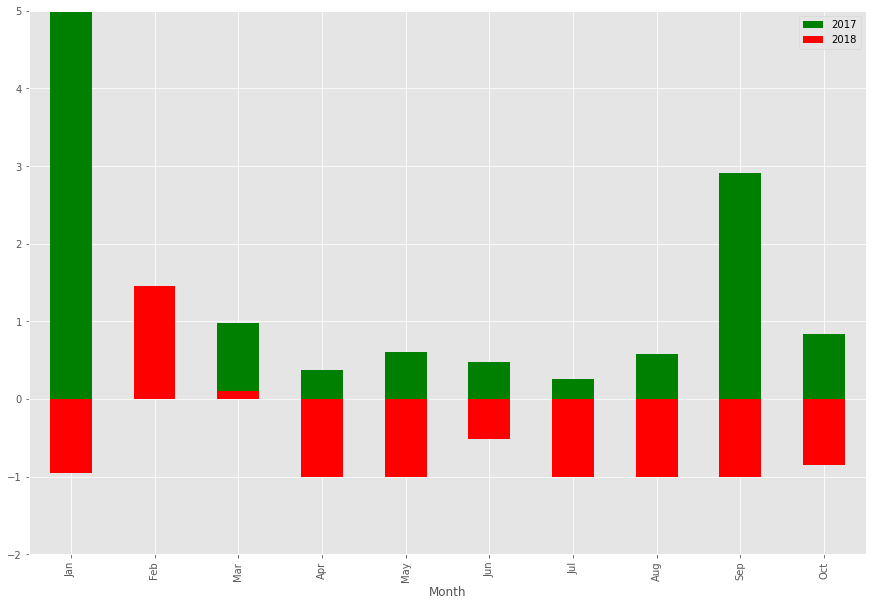

In [26]:
ax = df_price[df_price['Year']==2017].plot(x='Month', y='pct', kind='bar', color='green')
df_price[df_price['Year']==2018].plot(x='Month', y='pct', ax=ax, kind='bar', color='red')
plt.ylim(-2,5)
plt.legend(labels=[2017, 2018])
plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>By comparing Year 2018 to 2017, the house sale price dropped in all month; the percentage changes in every month shows a negative change (drop in sale) indicating a slow down in housing market(?)

<h1 style='font-family:Trebuchet MS; color:#34495E'> Distance from city <a id='3'></a></h1>

In [27]:
min = df[['Distance', 'Regionname']].groupby(['Regionname']).min().rename(columns={'Distance':'Minimum Distance (km)'})
max = df[['Distance', 'Regionname']].groupby(['Regionname']).max().rename(columns={'Distance':'Maximum Distance (km)'})
med = df[['Distance', 'Regionname']].groupby(['Regionname']).median().rename(columns={'Distance':'Median Distance (km)'})

df_distance = pd.concat([min, max, med], axis=1)
df_distance = df_distance.sort_values(['Median Distance (km)'])
df_distance.style.background_gradient()

,Minimum Distance (km),Maximum Distance (km),Median Distance (km)
Regionname,,,
Northern Metropolitan,0.000000,25.900000,8.400000
Southern Metropolitan,0.700000,17.900000,9.000000
Western Metropolitan,4.300000,31.700000,9.700000
Eastern Metropolitan,7.800000,27.000000,14.200000
South-Eastern Metropolitan,14.700000,38.000000,22.200000
Western Victoria,29.800000,37.500000,29.800000
Northern Victoria,20.100000,48.100000,31.700000
Eastern Victoria,25.200000,47.300000,35.200000


<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'> Northern, Southern, Western Metropolitan have the nearest Median distance (< 10km) to the city. Recalling the Avergae House Price in Southern Metropolitan is the highest followed by Eastern Metropolitan, there might be some correlation between them.

<h1 style='font-family:Trebuchet MS; color:#34495E'> Correlation between Variables <a id='4'></a></h1>

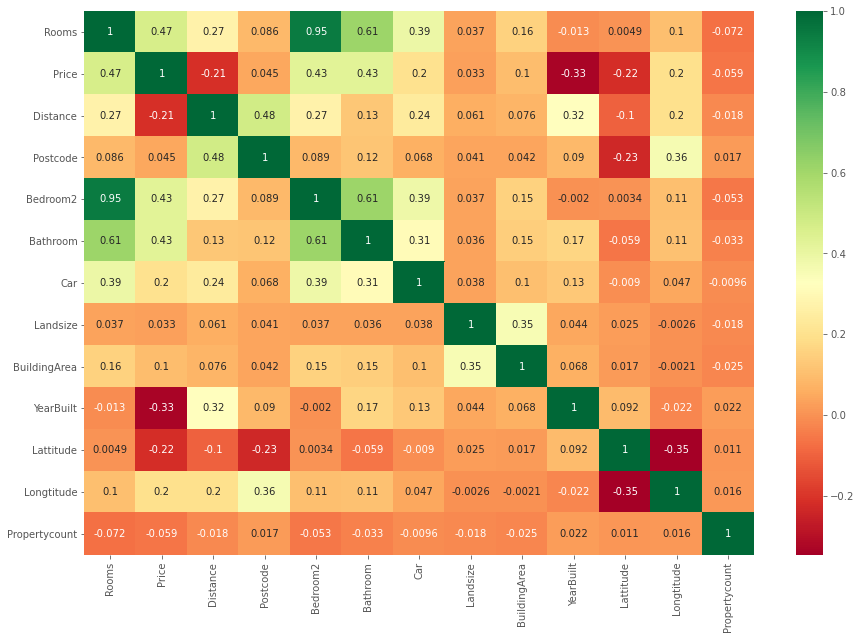

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [29]:
df.corr().loc['Price'].sort_values()

YearBuilt       -0.333306
Lattitude       -0.215607
Distance        -0.211384
Propertycount   -0.059017
Landsize         0.032748
Postcode         0.044950
BuildingArea     0.100754
Longtitude       0.197874
Car              0.201803
Bathroom         0.429878
Bedroom2         0.430275
Rooms            0.465238
Price            1.000000
Name: Price, dtype: float64

<h4 style='font-family:Trebuchet MS; color:#34495E'>Correlation Explanation:<br></h4>
<p style='font-family:Trebuchet MS; color:#34495E'>
    Correlation Coefficient = +1: A perfect positive relationship.<br>
    Correlation Coefficient = 0.8: A fairly strong positive relationship.<br>
    Correlation Coefficient = 0.6: A moderate positive relationship.<br>
    Correlation Coefficient = 0: No relationship. As one value increases, there is no tendency for the other value to change in a specific direction.<br>
    Correlation Coefficient = -1: A perfect negative relationship.<br>

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'> The highest correlation coefficient is <code>Rooms</code> (0.465), <code>Bedroom2</code> (0.430), <code>Bathroom</code> (0.430), followed by <code>YearBuilt</code>(-0.333). <br>
    However, all of them are considered weak correlation. 